Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
import plotly.express as px
import string
import pickle

Load the dataset

In [ ]:
netflix_data = pd.read_csv("/content/netflix_titles.csv")
netflix_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_data.fillna('', inplace = True)

In [ ]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
netflix_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,8807,4529,,2634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,8807,7693,,825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,8807,749,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8807,1768,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8807,18,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8807,221,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
moveie_counts = netflix_data['release_year'].value_counts().sort_index()
fig = go.Figure(data=go.Bar(x=moveie_counts.index, y =moveie_counts.values))

fig.update_layout(
    plot_bgcolor = 'rgb(17,17,17)',
    paper_bgcolor='rgb(17,17,17)',
    font_color='white',
    title='Number of Movies Released Each Year',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Movies')

)

fig.update_traces(marker_color='red')
fig.show()

In [ ]:
movie_counts = netflix_data['type'].value_counts()
fig = go.Figure(data=go.Pie(labels = movie_counts.index, values=movie_counts.values))

fig.update_layout(
    plot_bgcolor='rgb(17,17,17)',
    paper_bgcolor='rgb(17,17,17)',
    font_color='white',
    title='Tv Shows Vs Movies'
)

fig.update_traces(marker=dict(colors=['red']))
fig.show()

In [ ]:
top_countries = netflix_data['country'].value_counts().head(15)
fig = px.treemap(names=top_countries.index, parents=["" for _ in top_countries.index], values=top_countries.values)

fig.update_layout(
    plot_bgcolor='rgb(17,17,17)',
    paper_bgcolor='rgb(17,17,17)',
    font_color='white',
    title='Top countries with the highest number of media',
)

fig.show()

In [ ]:
country_movie_counts = netflix_data['country'].value_counts()

data = pd.DataFrame({'Country': country_movie_counts.index, 'Movie Count': country_movie_counts.values})

fig = px.choropleth(
    data_frame=data,
    locations = 'Country',
    locationmode='country names',
    color='Movie Count',
    title = 'Number of Media according to the country',
    color_continuous_scale = 'Reds',
    range_color = (0, data['Movie Count'].max()),
    labels = {'Movie Count': 'Number of Movies'}


)

fig.update_layout(
    plot_bgcolor='rgb(17,17,17)',
    paper_bgcolor='rgb(17,17,17)',
    font_color='white',
)

fig.show()

In [ ]:
ratings = list(netflix_data['rating'].value_counts().index)
rating_count = list(netflix_data['rating'].value_counts().values)

fig = go.Figure(
    data =[go.Bar(
        x = ratings,
        y = rating_count,
        marker_color = '#E50914'

    )]
)
fig.update_layout(
    title='Movies Rating Distribution',
    xaxis_title ='Ratings',
    yaxis_title = 'Count',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0.7)',

    font=dict(color='white')
)
fig.show()

In [ ]:
duration = list(netflix_data['duration'].value_counts().index)
duration_count = list(netflix_data['duration'].value_counts().values)

fig = go.Figure(
    data=[go.Bar(
        x = duration,
        y = duration_count,
        marker_color = '#E50914'
    )]
)

fig.update_layout(
    title='Movies Ratings Distribution',
    xaxis_title ='Duration',
    yaxis_title = 'Count',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0.7)',

    font=dict(color='white')
)
fig.show()

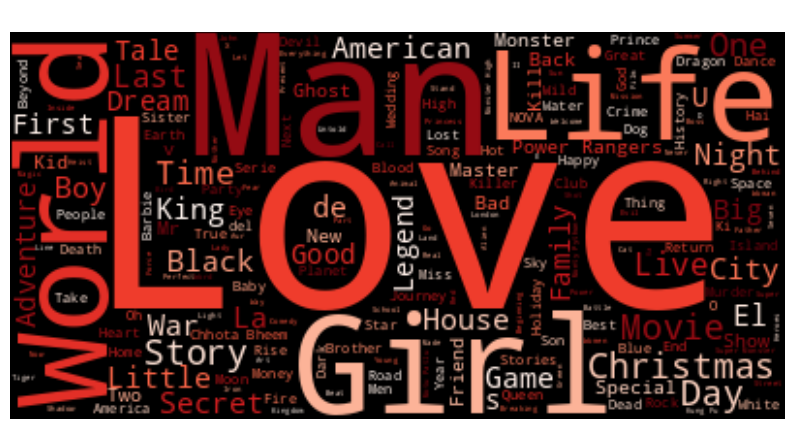

In [ ]:
title = netflix_data['title'].values
text = ' '.join(title)

wordcloud = WordCloud(background_color='black',colormap='Reds').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', color='white')
plt.show()


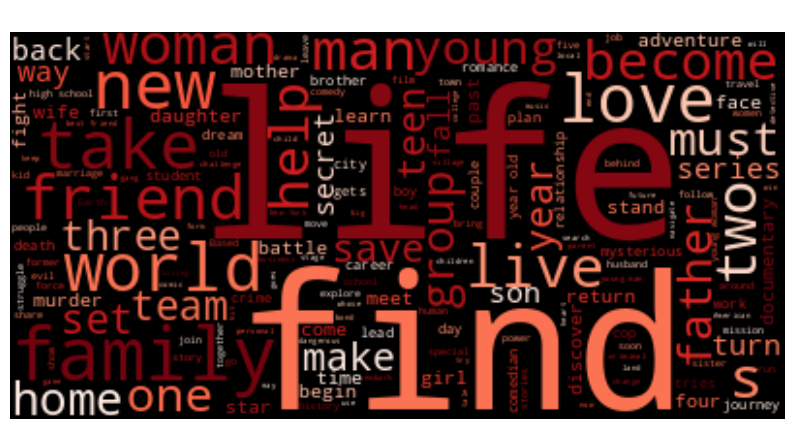

In [ ]:
description = netflix_data['description'].values
text =' '.join(description)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix descriptions', color='white')
plt.show()

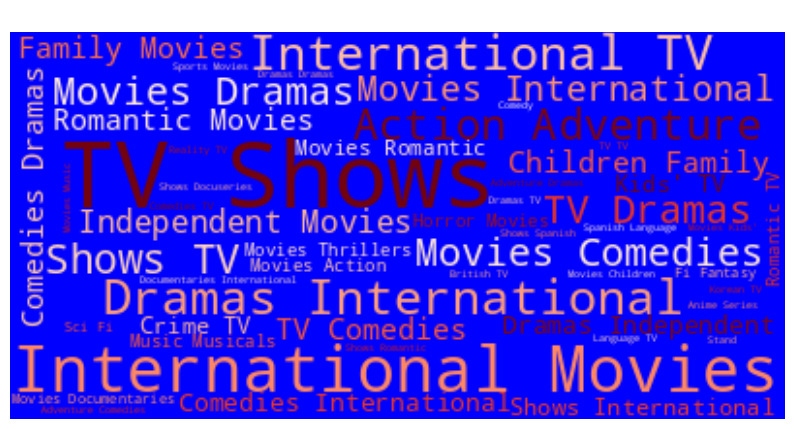

In [ ]:
listed_in = netflix_data['listed_in'].values
text = ' '.join(listed_in)

wordcloud = WordCloud(background_color='blue',colormap='Reds').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix listed_in', color='white')
plt.show()

Feature Engineering

In [ ]:
new_data = netflix_data[['title','type','director','cast','rating','listed_in','description']]
new_data.set_index('title',inplace=True)

In [ ]:
new_data.head()

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,Movie,Kirsten Johnson,,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
Blood & Water,TV Show,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
Jailbirds New Orleans,TV Show,,,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
Kota Factory,TV Show,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Cleaning the data

In [ ]:
class TextCleaner:
  def seperate_text(self, texts):
    unique_texts = set()
    for text in text.split(','):
      unique_texts.add(text.strip().lower())
    return ' '.join(unique_texts)

  def remove_space(self, texts):
    return texts.replace(' ', '').lower()
  def remove_punc(self, texts):
      text = texts.lower()
      texts = texts.translate(str.maketrans('', '', string.punctuation))
      return ' '.join(texts.split())

  def clean_text(self, texts):
    texts = self.seperate_text(texts)
    texts = self.remove_space(texts)
    texts = self.remove_punc
    return texts

In [ ]:
cleaner = TextCleaner()

In [ ]:
new_data['type'] = new_data['type'].apply(cleaner.remove_space)
new_data['director'] = new_data['director'].apply(cleaner.seperate_text)
new_data['cast'] = new_data['cast'].apply(cleaner.seperate_text)
new_data['rating'] = new_data['rating'].apply(cleaner.remove_space)
new_data['listed_in'] = new_data['listed_in'].apply(cleaner.seperate_text)
new_data['description'] = new_data['description'].apply(cleaner.remove_punc)

<ipython-input-23-fecb1de624f1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



UnboundLocalError: local variable 'text' referenced before assignment

In [ ]:
new_data.head()

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,movie,Kirsten Johnson,,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
Blood & Water,tvshow,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
Ganglands,tvshow,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
Jailbirds New Orleans,tvshow,,,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
Kota Factory,tvshow,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
new_data['BoW'] = new_data.apply(lambda row: ' '.join(row.dropna().values),axis=1)
new_data.drop(new_data.columns[:-1], axis=1, inplace=True)

<ipython-input-26-4a5e6a8f1a3d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-4a5e6a8f1a3d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
new_data.head()

,BoW
title,
Dick Johnson Is Dead,movie Kirsten Johnson PG-13 Documentaries As ...
Blood & Water,"tvshow Ama Qamata, Khosi Ngema, Gail Mabalane..."
Ganglands,"tvshow Julien Leclercq Sami Bouajila, Tracy Go..."
Jailbirds New Orleans,"tvshow TV-MA Docuseries, Reality TV Feuds, f..."
Kota Factory,"tvshow Mayur More, Jitendra Kumar, Ranjan Raj..."


In [ ]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_data['BoW'])

In [ ]:
cosine_sim =cosine_similarity(tfid_matrix, tfid_matrix)
cosine_sim

array([[1.        , 0.00508009, 0.02014897, ..., 0.01063627, 0.02078336,
        0.03070197],
       [0.00508009, 1.        , 0.01723814, ..., 0.00103087, 0.        ,
        0.0048652 ],
       [0.02014897, 0.01723814, 1.        , ..., 0.00559523, 0.01034927,
        0.03341977],
       ...,
       [0.01063627, 0.00103087, 0.00559523, ..., 1.        , 0.05670707,
        0.00602502],
       [0.02078336, 0.        , 0.01034927, ..., 0.05670707, 1.        ,
        0.01042238],
       [0.03070197, 0.0048652 , 0.03341977, ..., 0.00602502, 0.01042238,
        1.        ]])

In [ ]:
np.save('tfid_matrix.npy', tfid_matrix)
np.save('cosine_sim_matrix.npy', cosine_sim)

In [ ]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
  pickle.dump(tfid, f)

In [ ]:
final_data = netflix_data[['title', 'type']]

In [ ]:
final_data.head()

,title,type
0,Dick Johnson Is Dead,Movie
1,Blood & Water,TV Show
2,Ganglands,TV Show
3,Jailbirds New Orleans,TV Show
4,Kota Factory,TV Show


In [ ]:
final_data.to_csv('movie_data.csv', index = False)